In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
clinical = "clinicaltrial_data.csv"
clinical_df = pd.read_csv(clinical)
mouse_drug = "mouse_drug_data.csv"
mousedrug_df = pd.read_csv(mouse_drug)
#clinical_df.head(5) 
#mousedrug_df.head(15)
#mousedrug_df.Drug.unique()
merged_tablesdf = pd.merge (clinical_df, mousedrug_df, on="Mouse ID", how="outer")
#merged_tablesdf.head(10)



Capomulin outperformed the infubinol, placebo and ketapril treatments in tumor volume reduction as well as in survivability. Capomulin also had a lower occurence of metastatic site occurences. 
Ketapril has a positive effect on tumor volume. Tumors of the mice treated with ketapril saw only slightly larger growth than the placebo group mice. 
The group of mice treated with infubinal experienced the lowest survival rate of the three other treatments. 

In [2]:
print("\r\nTumor Response to Treatment")


Tumor Response to Treatment


In [3]:
#use pivot table P.315 compare all drug's aggregated av performance

merged_tablesdf_pivot_df = merged_tablesdf.pivot_table(values="Tumor Volume (mm3)",
                                                      index="Timepoint",
                                                      columns="Drug",
                                                      aggfunc="mean")
#only interested in Capomulin, Infubinol, Ketapril, Placebo 
#Sort out only these drugs out of the 10 
trial_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
trial_drugs_pivot_df = merged_tablesdf_pivot_df[trial_drugs]
trial_drugs_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [4]:
#data to grab standard error of the mean:
std_err_volume_pivot_df = merged_tablesdf.pivot_table(values="Tumor Volume (mm3)",
                                                      index="Timepoint",
                                                      columns="Drug",
                                                      aggfunc="sem")
trial_drugs_std_err_df = std_err_volume_pivot_df[trial_drugs]
trial_drugs_std_err_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


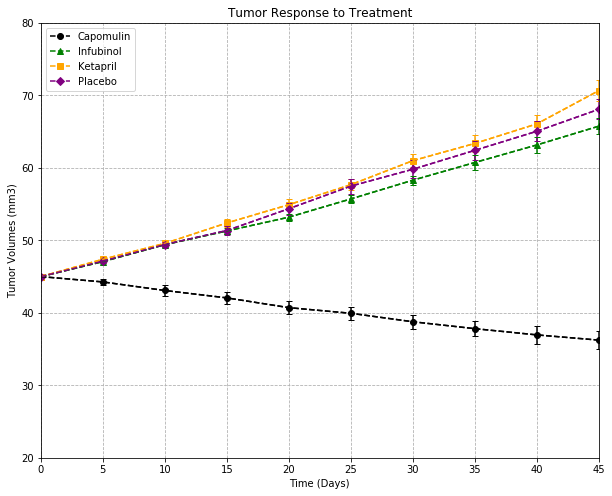


Metastatic Response to Treatment


In [5]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
drug_performance = []
for column, values in trial_drugs_pivot_df.iteritems():
    drug_performance.append(list(values))
drug_vol_sem = []
for column, values in trial_drugs_std_err_df.iteritems():
    drug_vol_sem.append(list(values))
x_axis = list(trial_drugs_pivot_df.index)
markers = ['o', '^', 's','D']
colors = ['black', 'green', 'orange', 'purple']
for marker, drugs, data, sem, color in zip(markers, trial_drugs, drug_performance, drug_vol_sem, colors):
    ax.plot(x_axis, 
            data,
            marker=marker,
            label=drugs,
            c=color,
            linestyle='--')

    ax.errorbar(x_axis, 
                data, 
                yerr=sem, 
                c=color, 
                capsize=3, 
                linestyle='--')
plt.xlim(0, 45)
plt.ylim(20, 80)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volumes (mm3)')
plt.grid(linestyle='dashed')
plt.legend()
plt.show()

print("\r\nMetastatic Response to Treatment")

In [6]:
trial_metastatic_pivot_df = merged_tablesdf.pivot_table(values='Metastatic Sites', 
                                                     index='Timepoint', 
                                                     columns='Drug', 
                                                     aggfunc='mean')
selected_drugs_meta_pivot_df = trial_metastatic_pivot_df[trial_drugs]
selected_drugs_meta_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [7]:
trial_sem_metastic_pivot_df = merged_tablesdf.pivot_table(values='Metastatic Sites', 
                                                     index='Timepoint', 
                                                     columns='Drug', 
                                                     aggfunc='sem')
trial_drugs_meta_sem_df = trial_sem_metastic_pivot_df[trial_drugs]
trial_drugs_meta_sem_df


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


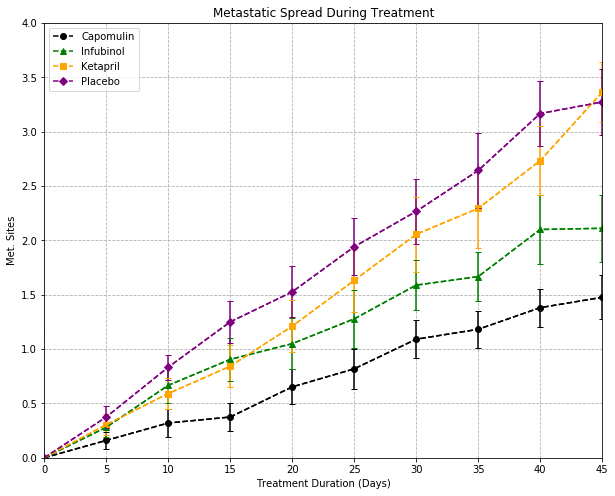


Survival Rates


In [8]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

drug_meta_performance = []
for column, values in selected_drugs_meta_pivot_df.iteritems():
    drug_meta_performance.append(list(values))

    drug_meta_sem = []
for column, values in trial_drugs_meta_sem_df.iteritems():
    drug_meta_sem.append(list(values))

x_axis = list(selected_drugs_meta_pivot_df.index)
markers = ['o', '^', 's','D']
colors = ['black', 'green', 'orange', 'purple']

for marker, drugs, data, sem, color in zip(markers, trial_drugs, drug_meta_performance, drug_meta_sem, colors):
    ax.plot(x_axis, 
            data,
            marker=marker,
            label=drugs,
            c=color,
            linestyle='--')

    ax.errorbar(x_axis, 
                data, 
                yerr=sem, 
                c=color, 
                capsize=3, 
                linestyle='--')
plt.xlim(0, 45)
plt.ylim(0, 4)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(linestyle='dashed')
plt.legend()
plt.show()
print("\r\nSurvival Rates")

In [9]:
trial_survival_pivot_df = merged_tablesdf.pivot_table(values='Mouse ID', 
                                                     index='Timepoint', 
                                                     columns='Drug', 
                                                     aggfunc='count')
trial_drugs_survival_df = trial_survival_pivot_df[trial_drugs]
#trial_drugs_survival_df

def normalize_mice_survival_rate(mouse_count):
    initial_mice_count = trial_drugs_survival_df.iloc[0].max()
    return (mouse_count / initial_mice_count) * 100

trial_drugs_survival_df = trial_drugs_survival_df.apply(normalize_mice_survival_rate)
trial_drugs_survival_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


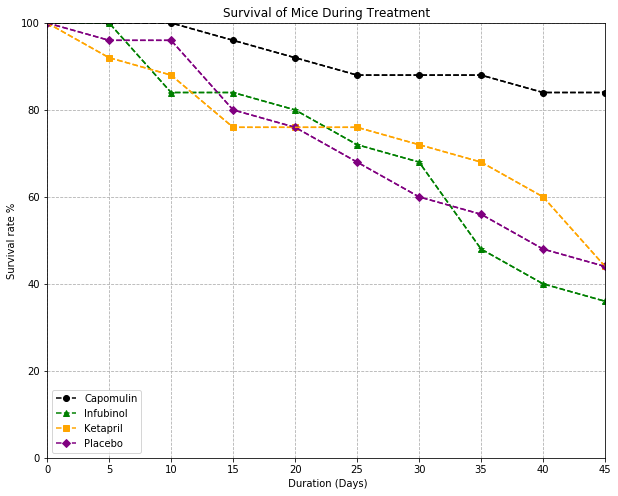


Summary Bar Graph


In [10]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

mouse_survival = []
for column, values in trial_drugs_survival_df.iteritems():
    mouse_survival.append(list(values))


x_axis = list(trial_drugs_survival_df.index)
markers = ['o', '^', 's','D']
colors = ['black', 'green', 'orange', 'purple']

for marker, drugs, data, color in zip(markers, trial_drugs, mouse_survival, colors):
    ax.plot(x_axis, 
            data,
            marker=marker,
            label=drugs,
            c=color,
            linestyle='--')

    ax.errorbar(x_axis, 
                data, 
                yerr=sem, 
                c=color, 
                capsize=3, 
                linestyle='--')
plt.xlim(0, 45)
plt.ylim(0, 100)
plt.title('Survival of Mice During Treatment')
plt.xlabel(' Duration (Days)')
plt.ylabel('Survival rate %')
plt.grid(linestyle='dashed')
plt.legend()
plt.show()
print("\r\nSummary Bar Graph")

In [11]:
trial_drugs_survival_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


In [12]:
#groupby drug for change in tumor size calcs>>>for bar chart
avg_tumor_size = pd.DataFrame(merged_tablesdf.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
avg_tumor_size = avg_tumor_size.unstack(level = 0)
avg_tumor_size.columns = avg_tumor_size.columns.get_level_values(1)


change_in_tumor_size = (avg_tumor_size.loc[45, :] - avg_tumor_size.loc[0, :])/avg_tumor_size.loc[0, :] * 100
change_in_tumor_size

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

<BarContainer object of 10 artists>

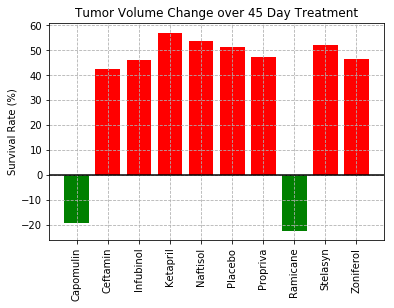

In [13]:
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black')
xlabels = change_in_tumor_size.index
plt.xticks(np.arange(len(xlabels)), xlabels, rotation = 90)
count = 0
plt.grid(linestyle='dashed')

height = change_in_tumor_size

bars = change_in_tumor_size.index

y_pos = np.arange(len(bars))

plt.bar(y_pos, height, 
        color = ['red' if change_in_tumor_size[r] > 0 else 'green' 
                 for r in np.arange(len(xlabels))])



